Epoch 1/20
13/13 [==============================] - 1s 13ms/step - loss: 565.3389 - mae: 21.8373 - val_loss: 470.0708 - val_mae: 19.8959
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 514.3448 - mae: 20.6155 - val_loss: 417.5430 - val_mae: 18.5166
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 454.5947 - mae: 19.0609 - val_loss: 354.0382 - val_mae: 16.7890
Epoch 4/20
13/13 [==============================] - 0s 5ms/step - loss: 379.8510 - mae: 17.0838 - val_loss: 280.7073 - val_mae: 14.6332
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 293.2726 - mae: 14.6862 - val_loss: 202.7051 - val_mae: 12.2377
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 206.9417 - mae: 11.9729 - val_loss: 130.9593 - val_mae: 9.7055
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 134.6485 - mae: 9.2756 - val_loss: 80.3214 - val_mae: 7.3941
Epoch 8/20
13/13 [==============================] -

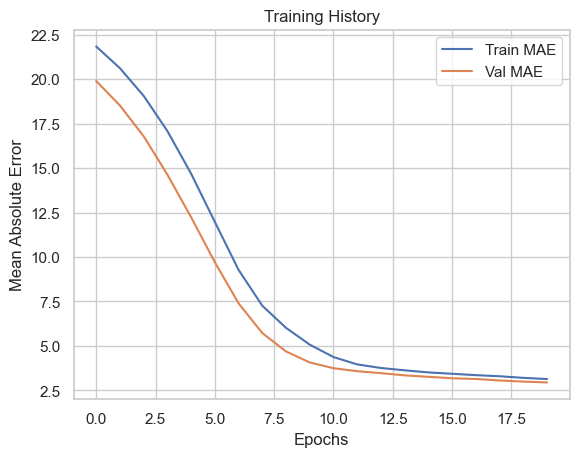

4/4 [==============================] - 0s 1ms/step


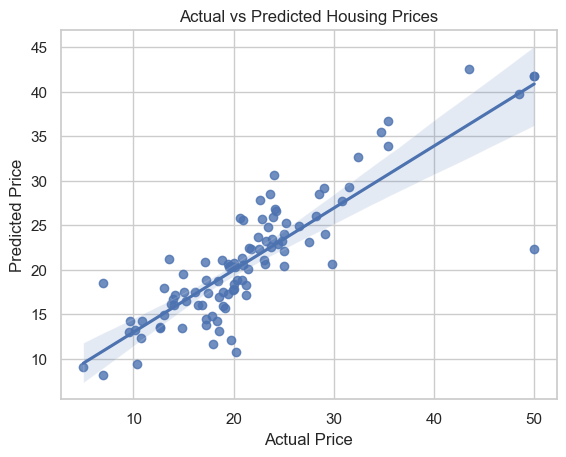

MAE: 2.94
MSE: 20.27
R² Score: 0.72


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Load CSV file (assuming the file is in the same directory)
data = pd.read_csv("BostonHousing.csv")

# Handle missing values in 'rm' column by filling with the mean
data['rm'].fillna(data['rm'].mean(), inplace=True)

# Split into features and target
X = data.drop(columns=["medv"])  # 'MEDV' is the target column (price)
y = data["medv"]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train_scaled, y_train, epochs=20, batch_size=32,
                    validation_data=(x_test_scaled, y_test), verbose=1)

# Plot training history
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Training History")
plt.legend()
plt.show()

# Predict and evaluate
y_pred = model.predict(x_test_scaled).flatten()

sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.show()

print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {metrics.r2_score(y_test, y_pred):.2f}")
